In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import collections
from collections import Counter
from scipy.special import expit

In [2]:
# !unzip -q "/content/drive/My Drive/Machine Learning Fall 2020/Programming_Assignment_3.zip" -d "/content/drive/My Drive/Machine Learning Fall 2020/Programming Assignment 3"

In [3]:
!gdown --id 1n0j5zbMXMVnLPUqadFNcCxiZRu0ChoXL
!unzip -q "Programming_Assignment_3.zip" -d ""

Downloading...
From: https://drive.google.com/uc?id=1n0j5zbMXMVnLPUqadFNcCxiZRu0ChoXL
To: /content/Programming_Assignment_3.zip
42.0MB [00:01, 37.6MB/s]


In [4]:
test = pd.DataFrame()
train = pd.DataFrame()
label_list = []
content = []

In [5]:
def file_reading(datatype,directory):
#   files = glob.glob('Dataset/'+datatype+'/'+directory+'/*.txt',  recursive = True)
    files = glob.glob('Dataset/'+datatype+'/'+directory+'/*.txt',  recursive = True)

    print("Files are :",len(files))
  # return
    if directory == 'neg':
        label = 0
    else:
        label = 1

    print("Sentiment is: ",label)
    for file in files:
        f = open(file,'r')
        content.append(f.read())
        label_list.append(label)
    print('Content:  ',content[0])

  
  
  
  # if datatype=='test':
  #   # # test['Review'] = content
  #   # test['bias'] = 1
  #   # test['Postive count'] = 0
  #   # test['Negative count'] = 0
  #   # # test['Label'] = label_list
  # else:
    # train['Review'] = content
    # train['bias'] = 1
    # train['Postive count'] = 0
    # train['Negative count'] = 0
    # train['Label'] = label_list




In [6]:

file_reading('test','neg')
file_reading('test','pos')

test['Review'] = content
test['bias'] = 1
test['Postive count'] = 0
test['Negative count'] = 0
test['Label'] = label_list

Files are : 12500
Sentiment is:  0
Content:   The recent death of Stephen Bach, one of the producers of HEAVEN'S GATE, has raised the specter of at least a partial resurrection of the reputation of the cursed film. Moreover the original release, the "long version" was recently shown on TCM exposing the film, in ail probability, to its largest audience ever. <br /><br />I saw the film when it first came out at a packed screening in a 3rd Avenue cinema across the street from Bloomingdales. I think it was released on a Friday and withdrawn on the following Wednesday. Maybe that wasn't a fair release but it was and is a terrible film. Seeing the full-length version recently confirmed that judgment and with some thirty years more experience watching and writing about films I am better able to articulate why.<br /><br />First there is the dreaded phrase "mise-en-scene" whose definition is at the same time so simple yet so amorphous that it puzzles even after being defined. Basically it's eve

In [7]:
test[test['Label']==1]

,Review,bias,Postive count,Negative count,Label
12500,A man is wrongfully accused of killing his fri...,1,0,0,1
12501,Finally! Third time lucky. This film has been ...,1,0,0,1
12502,"""Back in the Day"" is an interesting, but flawe...",1,0,0,1
12503,Brought Philip Larkin to life in a way that is...,1,0,0,1
12504,Most families will recognise similarities betw...,1,0,0,1
...,...,...,...,...,...
24995,"This is such a revered and studied film, a cla...",1,0,0,1
24996,"The movie with its single set, minimal cast, a...",1,0,0,1
24997,Both Disney and Bill Paxton did a fine job in ...,1,0,0,1
24998,"Anyone that is looking for an episode of ""Law ...",1,0,0,1


In [8]:
label_list = []
content = []
file_reading('train','neg')
file_reading('train','pos')
train['Review'] = content
train['bias'] = 1
train['Postive count'] = 0
train['Negative count'] = 0
train['Label'] = label_list

Files are : 12500
Sentiment is:  0
Content:   So what's the big fuss out of making an INDIANA JONES wannabe when you have an actor who's cast as a fictional dude from adventure storybooks who doesn't want to go out on an adventure??? Whoever wrote the script for JAKE SPEED was probably fired, but for whatever reasons possible, this movie greatly lacks in excitement! That doesn't mean it has no action, but look on the dark side of the picture. This has got to bare no resemblance to INDIANA JONES or other action-adventure thrills containing cliffhangers and narrow escapes, and JAKE SPEED was promoted that way using clever propaganda to make me and several others interested in it! Besides, I've never heard of the guy, so who needs his attention?
Files are : 12500
Sentiment is:  1
Content:   So what's the big fuss out of making an INDIANA JONES wannabe when you have an actor who's cast as a fictional dude from adventure storybooks who doesn't want to go out on an adventure??? Whoever wrote

In [9]:
# train['Review'] = content
# train['bias'] = 1
# train['Postive count'] = 0
# train['Negative count'] = 0
# train['Label'] = label_list

In [10]:
train[train['Label'] == 1]

,Review,bias,Postive count,Negative count,Label
12500,French film directors continue to amaze with t...,1,0,0,1
12501,But how can you stand to mange a baseball team...,1,0,0,1
12502,"Before Tuscan Sky, I saw Diane Lane's tender p...",1,0,0,1
12503,Ya know when one looks at this Brian DePalma f...,1,0,0,1
12504,To me A Matter of Life and Death is just that-...,1,0,0,1
...,...,...,...,...,...
24995,When I saw this animation for first time (I wa...,1,0,0,1
24996,My siblings and I stumbled upon The Champions ...,1,0,0,1
24997,"The mystery here is why this delightful, small...",1,0,0,1
24998,I had heard this film was a study of a landsca...,1,0,0,1


In [11]:
# len(content)
# content[0]

In [12]:
# print(label_list)
# print(len(label_list))

In [13]:
train.head()

,Review,bias,Postive count,Negative count,Label
0,So what's the big fuss out of making an INDIAN...,1,0,0,0
1,"Well! What can one say? Firstly, this adaptati...",1,0,0,0
2,It was a Sunday night and I was waiting for th...,1,0,0,0
3,i've discovered that this film gets rented bas...,1,0,0,0
4,If you are going to attempt building tension i...,1,0,0,0


In [14]:
train[train['Label']==0]

,Review,bias,Postive count,Negative count,Label
0,So what's the big fuss out of making an INDIAN...,1,0,0,0
1,"Well! What can one say? Firstly, this adaptati...",1,0,0,0
2,It was a Sunday night and I was waiting for th...,1,0,0,0
3,i've discovered that this film gets rented bas...,1,0,0,0
4,If you are going to attempt building tension i...,1,0,0,0
...,...,...,...,...,...
12495,Allow me to start this review by saying this: ...,1,0,0,0
12496,"Johnathan Frakes is a good actor and, when he'...",1,0,0,0
12497,I rented this back in the 80's and honestly ca...,1,0,0,0
12498,Elvis has left the building and he's lucky bec...,1,0,0,0


In [15]:
def preprocessing(data):
    data['Review'] = data['Review'].str.lower()
    data['without_stopwords'] = data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    data['Review'] = data['without_stopwords']
    data.drop(columns='without_stopwords',inplace = True)
    data['Review'] = data['Review'].str.replace('[^\w\s\d]','')
    return data

In [16]:
f = open('Dataset/stop_words.txt','r')
stop_words = f.read()

pos = open('Dataset/positive_words.txt','r')
pos_words = pos.read()

nega = open('Dataset/negative_words.txt','r',encoding='latin-1')
# negative_words = ""

negative_words = nega.read()
# print('Try',negative_words)
# try:
#   neg_words = negative_words.decode('Latin')
# except:
#   print("error")


train = preprocessing(train)
test = preprocessing(test)

train.head()

,Review,bias,Postive count,Negative count,Label
0,whats big fuss making indiana jones wannabe ac...,1,0,0,0
1,well one say firstly adaptation far long 4 hou...,1,0,0,0
2,sunday night waiting advertised movie tv said ...,1,0,0,0
3,ive discovered film gets rented based packagin...,1,0,0,0
4,going attempt building tension film always goo...,1,0,0,0


In [17]:
test.head()

,Review,bias,Postive count,Negative count,Label
0,recent death stephen bach one producers heaven...,1,0,0,0
1,watched description cover art yet deceivedi ge...,1,0,0,0
2,even understand tried accomplish movie mean re...,1,0,0,0
3,bad comments movie add feel way may look like ...,1,0,0,0
4,difficult tough brad sykes hardworking guy lov...,1,0,0,0


In [18]:
def count_update(data,datatype):
    index = 0
    for i in data['Review']:
        i=i.lower()
        neg_count = 0 
        pos_count = 0 
        word_count = Counter(i.split())
        # print(word_count)
        for k,v in word_count.items():
            if k in pos_words:
                pos_count = pos_count + v
            elif k in negative_words:
                neg_count = neg_count + v
            # print("Neg ", k)
        if datatype=="test":
            test['Negative count'][index] = neg_count
            test['Postive count'][index] = pos_count
            index = index + 1
            data = test

        else:
            train['Negative count'][index] = neg_count
            train['Postive count'][index] = pos_count
            index = index + 1
            data = train

    return data

    
  

In [19]:
train = count_update(train,"train")
test = count_update(test,"test")

test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarn

,Review,bias,Postive count,Negative count,Label
0,recent death stephen bach one producers heaven...,1,139,72,0
1,watched description cover art yet deceivedi ge...,1,19,14,0
2,even understand tried accomplish movie mean re...,1,26,13,0
3,bad comments movie add feel way may look like ...,1,32,19,0
4,difficult tough brad sykes hardworking guy lov...,1,20,20,0


In [20]:
X_train = np.asarray(train[["bias","Postive count","Negative count"]])
y_train = np.asarray(train['Label'])
X_test = np.asarray(test[["bias","Postive count","Negative count"]])
y_test = np.asarray(test['Label'])

# Part 1

**Sigmoid function**

In [21]:
def predict_old(data,list_theta):
    list_theta = np.transpose(np.array(list_theta))
    hx = list_theta*data
    # h_x = hx.sum()

    hx_final = 1/(1+np.exp(-1*hx))
    h_xfinal = expit(data @ list_theta)


    return hx_final,h_xfinal

In [22]:
# values = predict(X_train,thetas)
# values

In [23]:
thetas = np.zeros(len(X_train[0]))
# val = predict(X_train[1],thetas)
# val

**Cost Function**

In [24]:
epsilon = 1e-5

def entropy_loss_old(X,Y,list_theta):
    m = Y.size
    J = 0

    temp = 0
    _,hx = predict(X,list_theta)
    for index in range(m):

        value = (Y[index]*np.log(hx[index] + epsilon)) + ((1-Y[index])*(np.log(1-hx[index] + epsilon)))
        temp = temp + value
    J = -1*(1/m)*temp

    return J



In [25]:
# temp_X = X_train[-5:]
# temp_y = y_train[-5:]

# # [0] in y_train

In [26]:
# thetas = np.zeros(len(X_train[0]))
# loss = entropy_loss(X_train,y_train,thetas)
# loss

In [27]:
def LR_gradientDescent_old(X,Y,alpha,n_epoch):
    m = Y.size  
    J = list()  
    thetas = np.zeros(len(X[0]))
    epoch_ls = []
    epoch_j = []
    for epoch in range(n_epoch):
        temp_thetas = []
        temp_1 = 0
        _,hx = predict(X,thetas)
        for j in range(len(thetas)):
            for i in range(m):
                value = (hx[i] - Y[i])*X[i][j]
                temp_1 = temp_1 + value
                temp_1 = thetas[j] - alpha*(1/m)*temp_1
            temp_thetas.append(temp_1)


    print("temp thetas : ",entropy_loss(X, Y, thetas))
    for i in range(0,len(thetas)):
        thetas[i] = temp_thetas[i]


    J.append(entropy_loss(X, Y, thetas))

    if (epoch % 100 == 0):
        epoch_ls.append(epoch)
        epoch_j.append(J[-1])
        print('Cost at Epoch ', epoch,' ',J[-1])
    return thetas,J,epoch_ls,epoch_j

In [28]:
# n_epoch = 500
# alpha = 0.01

# finalthetas, J,epoch_ls,epoch_j = LR_gradientDescent(X_train,y_train,alpha,n_epoch)
# # print('Value of thetas', thetas)
# print('Value of Cost ftn', J[-1])

In [29]:
# def Cross_entropy_loss(X,Theta,Y_TrainData):
#     h_theta= Sigmoid(X,Theta) 
#     Y_TrainData=Y_TrainData.reshape(Y_TrainData.shape[0],1)
#     #Using log2 base for cross entropy loss
#     return (-1/X.shape[0]) * np.sum(Y_TrainData*np.log2(h_theta  +1e-10)+  (1-Y_TrainData)*np.log2(1-h_theta +1e-10))

In [30]:
def predict(data,list_theta):
  #list_theta = np.transpose(np.array(list_theta))
  hx =data.dot(list_theta) #list_theta*data
  # h_x = hx.sum()
  
  hx_final = 1/(1+np.exp(-1*hx))
  h_xfinal = expit(data @ list_theta)


  return hx_final,h_xfinal

In [31]:
epsilon = 1e-10

def entropy_loss(X,Y,list_theta):
  m = Y.size
  J = 0

  temp = 0
  _,hx = predict(X,list_theta)
  for index in range(m):
    
    value = (Y[index]*np.log(hx[index] + epsilon)) + ((1-Y[index])*(np.log(1-hx[index] + epsilon)))
    temp = temp + value
  J = -1*(1/m)*temp

  return J[0]

In [32]:
def LR_gradientDescent(X,Y,alpha,n_epoch):
    m = Y.size  
    J = list()  
    thetas = np.zeros(len(X[0])).reshape(-1,1)
    print(thetas.shape)
    epoch_ls = []
    epoch_j = []
    for epoch in range(n_epoch):

        # cost_val=entropy_loss(X, Y, thetas)
        _,hx = predict(X,thetas)

        hx=(hx.reshape(-1,1),thetas)[0]

        thetas-= (alpha/X.shape[0] )*  (   ((  hx -  Y ).T) .dot(X) ).T


        J.append(entropy_loss(X, Y, thetas))
        if (epoch % 10 == 0):
          epoch_ls.append(epoch)
          epoch_j.append(J[-1])
        if (epoch%100 == 0):
          print('Cost at Epoch ', epoch,' ',J[-1])
    # temp_thetas = []
    # temp_1 = 0
    # _,hx = predict(X,thetas)
    # for j in range(len(thetas)):
    #   for i in range(m):
    #     value = (hx[i] - Y[i])*X[i][j]
    #     temp_1 = temp_1 + value
    #   temp_1 = thetas[j] - alpha*(1/m)*temp_1
    #   temp_thetas.append(temp_1)

    
    # print("temp thetas : ",entropy_loss(X, Y, thetas))
    # for i in range(0,len(thetas)):
    #   thetas[i] = temp_thetas[i]
     

    J.append(entropy_loss(X, Y, thetas))
    #print("cost ",entropy_loss(X, Y, thetas))
    # if (epoch % 100 == 0):
    #     epoch_ls.append(epoch)
    #     epoch_j.append(J[-1])
    #     print('Cost at Epoch ', epoch,' ',J[-1])
    return thetas,J,epoch_ls,epoch_j

In [33]:
X_train = np.asarray(train[["bias","Postive count","Negative count"]])
y_train = np.asarray(train['Label'])
X_test = np.asarray(test[["bias","Postive count","Negative count"]])
y_test = np.asarray(test['Label'])
y_train=(y_train.reshape(-1,1))

In [34]:
n_epoch = 1500
alpha = 0.001

finalthetas, J,epoch_ls,epoch_j = LR_gradientDescent(X_train,y_train,alpha,n_epoch)
# print('Value of thetas', thetas)
print('Value of Cost ftn', J[-1])

(3, 1)
Cost at Epoch  0   0.6920801151591123
Cost at Epoch  100   0.6541113854647301
Cost at Epoch  200   0.6497385750355547
Cost at Epoch  300   0.6490535848201865
Cost at Epoch  400   0.6489334037332973
Cost at Epoch  500   0.6489112907902225
Cost at Epoch  600   0.648907082546607
Cost at Epoch  700   0.6489062137242758
Cost at Epoch  800   0.6489059743239264
Cost at Epoch  900   0.6489058549486635
Cost at Epoch  1000   0.6489057594104259
Cost at Epoch  1100   0.6489056694975118
Cost at Epoch  1200   0.6489055817453093
Cost at Epoch  1300   0.6489054954809563
Cost at Epoch  1400   0.648905410560564
Value of Cost ftn 0.6489053277705422


**Making prediction**

In [36]:
def making_pred(X,Y,thetas):
    m = len(Y)
    predicted_labels = []
    _,hx = predict(X,thetas)
    for i in range(m):
    # _,hx = predict(X[i],thetas)
    # print(hx)

      if hx[i] < 0.5:
        predicted_labels.append(0)
      else:
        predicted_labels.append(1)
    return predicted_labels


In [37]:
# temp_Xtest = X_test[-5:]
# temp_ytest = y_test[-5:]

ls_labels = making_pred(X_test,y_test,finalthetas)
print(ls_labels)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 

**Evaluation**

In [38]:
def classification_accuracy(actual, predicted):
    total = len(actual)
    correct = 0
    for i in range(total):
        if actual[i] == predicted[i]:
            correct = correct + 1
  # query = np.where(actual == predicted,1,0)
  # occurrence_counts = Counter(query)
  # correct = occurrence_counts[1]
    accuracy = (correct/total) * 100

    return accuracy


In [40]:
# ls_labels = np.asarray(ls_labels)
y_test = list(test['Label'])
# y_test
acc = classification_accuracy(y_test,ls_labels)
print("The accuracy of the classifier is: ",acc,"%")

The accuracy of the classifier is:  63.739999999999995 %


In [41]:
def confusion_matrix(actual,predicted):
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  for i in range(len(actual)):
    if actual[i]==1:
      if actual[i] == predicted[i]:
        tp = tp + 1
      else:
        fn = fn +1
    else:
      if actual[i] == predicted[i]:
        tn = tn + 1
      else:
        fp = fp + 1
  return (tp,fp,tn,fn)

In [42]:
(tp,fp,tn,fn) = confusion_matrix(y_test,ls_labels)
class_matrix = [[tp,fp],[fn,tn]]
print("Classification Matrix: ")
print( class_matrix)

Classification Matrix: 
[[8101, 4666], [4399, 7834]]


**Plots**

In [43]:
epoch_ls.append(n_epoch)
epoch_j.append(J[-1])
# epoch_j


In [44]:
finalthetas

array([[-0.00166522],
       [ 0.04926814],
       [-0.07978318]])

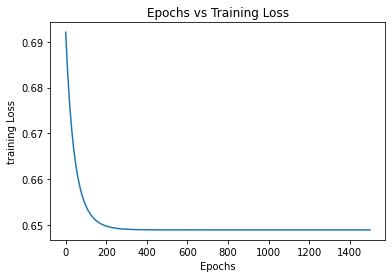

In [45]:
# plt.figure(figsize=(20,10))
ax = plt.gca()

ax.plot(epoch_ls,epoch_j)
plt.xlabel('Epochs')
plt.ylabel('training Loss')
plt.title('Epochs vs Training Loss')

plt.show()


# Part 2

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [47]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
accuracy = accuracy_score(y_test,predicted)
conf_mat = confusion_matrix(y_test,predicted)

print("Accuracy is: ",accuracy)
print("Confusion Matrix:\n",conf_mat)

Accuracy is:  0.6378
Confusion Matrix:
 [[7906 4594]
 [4461 8039]]
